In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import numpy as np
import shap #Check version, SHAP 0.36.0
import time
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, InputLayer
from sklearn.ensemble import IsolationForest
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [3]:
df_predict = pd.read_csv(r"C:/Users/Nicklas Branding/Desktop/infection_per_sweden_on_covid19.csv",encoding="latin-1")

In [4]:
df_predict.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0,0,0
1,2020,7,0,0,0,1,0,0,0,0,0,0,0
2,2020,8,0,0,0,1,0,0,0,0,0,0,0
3,2020,9,13,0,0,14,0,0,0,0,0,0,0
4,2020,10,211,2,2,225,2,3,3,0,0,0,0


In [5]:
df_predict = df_predict.drop(['Antal_fall_100000inv_vecka', 'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv', 'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade', 'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka', 'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv','veckonummer','år'],axis=1)

In [6]:
feature = ['Antal_fall_vecka']

In [7]:
dfX_predict = df_predict[feature]
#dfX.head(48)

<AxesSubplot:>

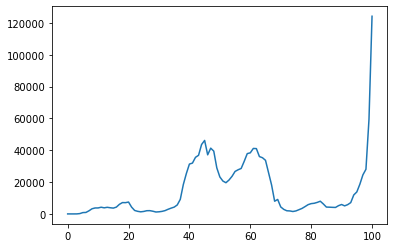

In [8]:
dfX_predict["Antal_fall_vecka"].plot()

In [9]:
dfX_predict.shape


(101, 1)

In [10]:
mu = df_predict.mean(0)
sd = df_predict.std(0)
df_norm = (df_predict - mu) / sd
df_norm.head(3)
Y_mu_2 = np.asarray(mu[feature])
Y_sd_2 = np.asarray(sd[feature])

In [11]:
df_norm = np.asarray(df_norm)
df_norm.reshape((-1,1))

array([[-0.80600237],
       [-0.80605767],
       [-0.80605767],
       [-0.80533875],
       [-0.79438912],
       [-0.7597153 ],
       [-0.7549594 ],
       [-0.6978333 ],
       [-0.62749022],
       [-0.59923133],
       [-0.59856771],
       [-0.57362689],
       [-0.59414362],
       [-0.57639195],
       [-0.59209748],
       [-0.60371072],
       [-0.5693687 ],
       [-0.47308938],
       [-0.4121475 ],
       [-0.41491256],
       [-0.39378752],
       [-0.569424  ],
       [-0.68555644],
       [-0.71635919],
       [-0.73328134],
       [-0.72000906],
       [-0.69468113],
       [-0.69257969],
       [-0.71276461],
       [-0.73969628],
       [-0.73239652],
       [-0.71801822],
       [-0.69103125],
       [-0.64463358],
       [-0.60465084],
       [-0.5694793 ],
       [-0.49526515],
       [-0.29977554],
       [ 0.21557597],
       [ 0.59886831],
       [ 0.92591937],
       [ 0.9604826 ],
       [ 1.1604516 ],
       [ 1.23107118],
       [ 1.60678726],
       [ 1

In [12]:
training_data = df_norm[0:61]
testing_data_38 = df_norm[61:101]
testing_data_32 = df_norm[61:93]
testing_data_16 = df_norm[61:77]
testing_data_8 = df_norm[61:69]

In [13]:
look_back=2
train_genertor = TimeseriesGenerator(training_data,training_data,length=look_back,batch_size=1)
test_genertor_38 = TimeseriesGenerator(testing_data_38,testing_data_38,length=look_back,batch_size=1)
test_genertor_32 = TimeseriesGenerator(testing_data_32,testing_data_32,length=look_back,batch_size=1)
test_genertor_16 = TimeseriesGenerator(testing_data_16,testing_data_16,length=look_back,batch_size=1)
test_genertor_8 = TimeseriesGenerator(testing_data_8,testing_data_8,length=look_back,batch_size=1)
print("samples", len(train_genertor))

samples 59


In [14]:
X_test_1_sample = test_genertor_38[0]
Y_test_1_sample = testing_data_38[0:1]

X_test_2_sample = test_genertor_38[1]
Y_test_2_sample = testing_data_38[1:2]

X_test_3_sample = test_genertor_38[2]
Y_test_3_sample = testing_data_38[2:3]

X_test_4_sample = test_genertor_38[3]
Y_test_4_sample = testing_data_38[3:4]

X_test_5_sample = test_genertor_38[4]
Y_test_5_sample = testing_data_38[4:5]

X_test_6_sample = test_genertor_38[5]
Y_test_6_sample = testing_data_38[5:6]

X_test_7_sample = test_genertor_38[6]
Y_test_7_sample = testing_data_38[6:7]

X_test_8_sample = test_genertor_38[7]
Y_test_8_sample = testing_data_38[7:8]

X_test_9_sample = test_genertor_38[8]
Y_test_9_sample = testing_data_38[8:9]

X_test_10_sample = test_genertor_38[9]
Y_test_10_sample = testing_data_38[9:10]

X_test_11_sample = test_genertor_38[10]
Y_test_11_sample = testing_data_38[10:11]

X_test_12_sample = test_genertor_38[11]
Y_test_12_sample = testing_data_38[11:12]

X_test_13_sample = test_genertor_38[12]
Y_test_13_sample = testing_data_38[12:13]

X_test_14_sample = test_genertor_38[13]
Y_test_14_sample = testing_data_38[13:14]

X_test_15_sample = test_genertor_38[14]
Y_test_15_sample = testing_data_38[14:15]

X_test_16_sample = test_genertor_38[15]
Y_test_16_sample = testing_data_38[15:16]

X_test_17_sample = test_genertor_38[16]
Y_test_17_sample = testing_data_38[16:17]

X_test_18_sample = test_genertor_38[17]
Y_test_18_sample = testing_data_38[17:18]

X_test_19_sample = test_genertor_38[18]
Y_test_19_sample = testing_data_38[18:19]

X_test_20_sample = test_genertor_38[19]
Y_test_20_sample = testing_data_38[19:20]

X_test_21_sample = test_genertor_38[20]
Y_test_21_sample = testing_data_38[20:21]

X_test_22_sample = test_genertor_38[21]
Y_test_22_sample = testing_data_38[21:22]

X_test_23_sample = test_genertor_38[22]
Y_test_23_sample = testing_data_38[22:23]

X_test_24_sample = test_genertor_38[23]
Y_test_24_sample = testing_data_38[23:24]

X_test_25_sample = test_genertor_38[24]
Y_test_25_sample = testing_data_38[24:25]

X_test_26_sample = test_genertor_38[25]
Y_test_26_sample = testing_data_38[25:26]

X_test_27_sample = test_genertor_38[26]
Y_test_27_sample = testing_data_38[26:27]

X_test_28_sample = test_genertor_38[27]
Y_test_28_sample = testing_data_38[27:28]

X_test_29_sample = test_genertor_38[28]
Y_test_29_sample = testing_data_38[28:29]

X_test_30_sample = test_genertor_38[29]
Y_test_30_sample = testing_data_38[29:30]

X_test_31_sample = test_genertor_38[30]
Y_test_31_sample = testing_data_38[30:31]

X_test_32_sample = test_genertor_38[31]
Y_test_32_sample = testing_data_38[31:32]

X_test_33_sample = test_genertor_38[32]
Y_test_33_sample = testing_data_38[32:33]

X_test_34_sample = test_genertor_38[33]
Y_test_34_sample = testing_data_38[33:34]

X_test_35_sample = test_genertor_38[34]
Y_test_35_sample = testing_data_38[34:35]

X_test_36_sample = test_genertor_38[35]
Y_test_36_sample = testing_data_38[35:36]

X_test_37_sample = test_genertor_38[36]
Y_test_37_sample = testing_data_38[36:37]

X_test_38_sample = test_genertor_38[37]
Y_test_38_sample = testing_data_38[37:38]

In [15]:
## Remove outliers
iso = IsolationForest(contamination=0.1)
outlier_2 = iso.fit_predict(X_training)
# select all rows that are not outliers
outliers_row2 = outlier_2 != -1
X_training, Y_training = X_training[outliers_row2, :], Y_training[outliers_row2]

NameError: name 'X_training' is not defined

In [18]:
GRU_model_2 = Sequential()
GRU_model_2.add(GRU(256,activation="relu", input_shape=(look_back,1),return_sequences=True))
GRU_model_2.add(GRU(126,activation="relu",return_sequences=True))
GRU_model_2.add(GRU(32,activation="relu",return_sequences=False))
GRU_model_2.add(Dense(1))
GRU_model_2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'mean_squared_error')
GRU_model_2.fit(train_genertor, steps_per_epoch = 1, epochs = 1300,verbose=1)

Epoch 1/1300
1/1 [==============================] - 4s 4s/step - loss: 0.3402
Epoch 2/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.5256
Epoch 3/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.5440
Epoch 4/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.1715
Epoch 5/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.3613
Epoch 6/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.4808
Epoch 7/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.6486
Epoch 8/1300
1/1 [==============================] - 0s 11ms/step - loss: 1.6615
Epoch 9/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.2427
Epoch 10/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0879
Epoch 11/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.4744
Epoch 12/1300
1/1 [==============================] - 0s 12ms/step - loss: 1.3438
Epoch 13/1300
1/1 [====================

1/1 [==============================] - 0s 10ms/step - loss: 0.0714
Epoch 103/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.4055
Epoch 104/1300
1/1 [==============================] - 0s 15ms/step - loss: 0.1147
Epoch 105/1300
1/1 [==============================] - 0s 13ms/step - loss: 1.4129
Epoch 106/1300
1/1 [==============================] - 0s 14ms/step - loss: 1.3933
Epoch 107/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.5096
Epoch 108/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.4245
Epoch 109/1300
1/1 [==============================] - 0s 15ms/step - loss: 0.8298
Epoch 110/1300
1/1 [==============================] - 0s 13ms/step - loss: 2.8318
Epoch 111/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.4175
Epoch 112/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.8197
Epoch 113/1300
1/1 [==============================] - 0s 15ms/step - loss: 1.7035
Epoch 114/1300
1/1 [===========

1/1 [==============================] - 0s 11ms/step - loss: 0.2320
Epoch 202/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.1437
Epoch 203/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.2241
Epoch 204/1300
1/1 [==============================] - 0s 12ms/step - loss: 1.1608
Epoch 205/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.1053
Epoch 206/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.1079
Epoch 207/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.4583
Epoch 208/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0907
Epoch 209/1300
1/1 [==============================] - 0s 11ms/step - loss: 1.1176
Epoch 210/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.2362
Epoch 211/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.1747
Epoch 212/1300
1/1 [==============================] - 0s 10ms/step - loss: 2.0721
Epoch 213/1300
1/1 [===========

1/1 [==============================] - 0s 10ms/step - loss: 0.0300
Epoch 301/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0978
Epoch 302/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 303/1300
1/1 [==============================] - 0s 10ms/step - loss: 4.4574e-04
Epoch 304/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.1030
Epoch 305/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.3461
Epoch 306/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.2479
Epoch 307/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0142
Epoch 308/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 309/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.4096
Epoch 310/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 311/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 312/1300
1/1 [=======

1/1 [==============================] - 0s 10ms/step - loss: 4.6549e-04
Epoch 399/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 400/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.3877
Epoch 401/1300
1/1 [==============================] - 0s 10ms/step - loss: 4.2758e-05
Epoch 402/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 403/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 404/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0337
Epoch 405/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 406/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.1127
Epoch 407/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 408/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.1111
Epoch 409/1300
1/1 [==============================] - 0s 11ms/step - loss: 2.5930e-04
Epoch 410/1300
1/1 

1/1 [==============================] - 0s 10ms/step - loss: 0.2638
Epoch 497/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.2377
Epoch 498/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.2596
Epoch 499/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 500/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 501/1300
1/1 [==============================] - 0s 11ms/step - loss: 7.2565e-04
Epoch 502/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.3850
Epoch 503/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0385
Epoch 504/1300
1/1 [==============================] - 0s 11ms/step - loss: 5.3299e-04
Epoch 505/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0581
Epoch 506/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0320
Epoch 507/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 508/1300
1/1 [===

1/1 [==============================] - 0s 13ms/step - loss: 0.0596
Epoch 595/1300
1/1 [==============================] - 0s 13ms/step - loss: 5.0111e-05
Epoch 596/1300
1/1 [==============================] - 0s 15ms/step - loss: 0.0794
Epoch 597/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.1244
Epoch 598/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.4047
Epoch 599/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.2591
Epoch 600/1300
1/1 [==============================] - 0s 20ms/step - loss: 1.7070e-04
Epoch 601/1300
1/1 [==============================] - 0s 19ms/step - loss: 0.0044
Epoch 602/1300
1/1 [==============================] - 0s 18ms/step - loss: 0.0317
Epoch 603/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 604/1300
1/1 [==============================] - 0s 18ms/step - loss: 0.3450
Epoch 605/1300
1/1 [==============================] - 0s 17ms/step - loss: 0.0471
Epoch 606/1300
1/1 [===

1/1 [==============================] - 0s 12ms/step - loss: 0.0045
Epoch 694/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.1157
Epoch 695/1300
1/1 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 696/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0367
Epoch 697/1300
1/1 [==============================] - 0s 12ms/step - loss: 3.4684e-05
Epoch 698/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.2318
Epoch 699/1300
1/1 [==============================] - 0s 13ms/step - loss: 1.2594e-04
Epoch 700/1300
1/1 [==============================] - 0s 11ms/step - loss: 4.1864e-04
Epoch 701/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0070
Epoch 702/1300
1/1 [==============================] - 0s 17ms/step - loss: 0.0013
Epoch 703/1300
1/1 [==============================] - ETA: 0s - loss: 0.003 - 0s 17ms/step - loss: 0.0034
Epoch 704/1300
1/1 [==============================] - 0s 16ms/step - loss: 0.

1/1 [==============================] - 0s 12ms/step - loss: 0.2608
Epoch 792/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.1362
Epoch 793/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0215
Epoch 794/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 795/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.1567
Epoch 796/1300
1/1 [==============================] - 0s 13ms/step - loss: 4.3299e-05
Epoch 797/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0108
Epoch 798/1300
1/1 [==============================] - 0s 13ms/step - loss: 3.6528e-04
Epoch 799/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0017
Epoch 800/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.1046
Epoch 801/1300
1/1 [==============================] - 0s 14ms/step - loss: 6.7564e-06
Epoch 802/1300
1/1 [==============================] - 0s 12ms/step - loss: 3.7720e-07
Epoch 803/1300


1/1 [==============================] - 0s 12ms/step - loss: 0.0023
Epoch 890/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0026
Epoch 891/1300
1/1 [==============================] - 0s 18ms/step - loss: 0.0165
Epoch 892/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0714
Epoch 893/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.2022
Epoch 894/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.1987
Epoch 895/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0691
Epoch 896/1300
1/1 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 897/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 898/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0439
Epoch 899/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 900/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0292
Epoch 901/1300
1/1 [===========

1/1 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 988/1300
1/1 [==============================] - 0s 16ms/step - loss: 0.0749
Epoch 989/1300
1/1 [==============================] - 0s 15ms/step - loss: 0.0056
Epoch 990/1300
1/1 [==============================] - 0s 15ms/step - loss: 6.5091e-04
Epoch 991/1300
1/1 [==============================] - 0s 18ms/step - loss: 0.0080
Epoch 992/1300
1/1 [==============================] - 0s 19ms/step - loss: 0.0998
Epoch 993/1300
1/1 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 994/1300
1/1 [==============================] - 0s 16ms/step - loss: 0.0088
Epoch 995/1300
1/1 [==============================] - 0s 13ms/step - loss: 1.1817e-04
Epoch 996/1300
1/1 [==============================] - 0s 11ms/step - loss: 0.0804
Epoch 997/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0801
Epoch 998/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0162
Epoch 999/1300
1/1 [===

1/1 [==============================] - 0s 27ms/step - loss: 0.0530
Epoch 1085/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0332
Epoch 1086/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 1087/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 1088/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0976
Epoch 1089/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 1090/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0023
Epoch 1091/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0052
Epoch 1092/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.1003
Epoch 1093/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0033
Epoch 1094/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0821
Epoch 1095/1300
1/1 [==============================] - 0s 13ms/step - loss: 9.2158e-04
Epoch 1096/1300


1/1 [==============================] - 0s 16ms/step - loss: 0.0050
Epoch 1182/1300
1/1 [==============================] - 0s 17ms/step - loss: 0.0010
Epoch 1183/1300
1/1 [==============================] - 0s 15ms/step - loss: 2.0170e-05
Epoch 1184/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 1185/1300
1/1 [==============================] - 0s 15ms/step - loss: 0.3535
Epoch 1186/1300
1/1 [==============================] - 0s 16ms/step - loss: 0.0263
Epoch 1187/1300
1/1 [==============================] - 0s 18ms/step - loss: 0.1358
Epoch 1188/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 1189/1300
1/1 [==============================] - 0s 16ms/step - loss: 0.0993
Epoch 1190/1300
1/1 [==============================] - 0s 13ms/step - loss: 1.3313e-05
Epoch 1191/1300
1/1 [==============================] - 0s 12ms/step - loss: 4.3370e-04
Epoch 1192/1300
1/1 [==============================] - 0s 12ms/step - loss: 7.8161e-04
Epoc

1/1 [==============================] - 0s 13ms/step - loss: 0.0189
Epoch 1279/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 1280/1300
1/1 [==============================] - 0s 13ms/step - loss: 4.7878e-04
Epoch 1281/1300
1/1 [==============================] - 0s 12ms/step - loss: 0.0822
Epoch 1282/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 1283/1300
1/1 [==============================] - 0s 13ms/step - loss: 2.2282e-04
Epoch 1284/1300
1/1 [==============================] - 0s 13ms/step - loss: 2.4799e-08
Epoch 1285/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 1286/1300
1/1 [==============================] - 0s 12ms/step - loss: 6.4816e-04
Epoch 1287/1300
1/1 [==============================] - 0s 14ms/step - loss: 0.0033
Epoch 1288/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 1289/1300
1/1 [==============================] - 0s 13ms/step - loss: 0.0031
Epoc

In [19]:
y_predict_38 = GRU_model_2.predict(test_genertor_38)
y_predict_38 = y_predict_38.reshape((-1))
print(y_predict_38)

[ 1.3547775   1.2796957   1.1302507   1.0892216   0.9485528   0.6768429
  0.3305932  -0.20552765 -0.30799067 -0.59752196 -0.68077123 -0.71253514
 -0.72585684 -0.72674525 -0.6908768  -0.63893646 -0.56644404 -0.47621226
 -0.4029156  -0.368735   -0.3390509  -0.2883199  -0.3087579  -0.4663729
 -0.5493626  -0.55575436 -0.562102   -0.52111566 -0.44913512 -0.45213893
 -0.4580315  -0.37915766 -0.1522912   0.186969    0.4320089   0.60334134
  0.7539659   1.2350738 ]


In [28]:
y_predict_sample_1 = y_predict_38[0:1]
y_predict_sample_2 = y_predict_38[1:2]
y_predict_sample_3 = y_predict_38[2:3]
y_predict_sample_4 = y_predict_38[3:4]
y_predict_sample_5 = y_predict_38[4:5]
y_predict_sample_6 = y_predict_38[5:6]
y_predict_sample_7 = y_predict_38[6:7]
y_predict_sample_8 = y_predict_38[7:8]
y_predict_sample_9 = y_predict_38[8:9]
y_predict_sample_10 = y_predict_38[9:10]
y_predict_sample_11 = y_predict_38[10:11]
y_predict_sample_12 = y_predict_38[11:12]
y_predict_sample_13 = y_predict_38[12:13]
y_predict_sample_14 = y_predict_38[13:14]
y_predict_sample_15 = y_predict_38[14:15]
y_predict_sample_16 = y_predict_38[15:16]
y_predict_sample_17 = y_predict_38[16:17]
y_predict_sample_18 = y_predict_38[17:18]
y_predict_sample_19 = y_predict_38[18:19]
y_predict_sample_20 = y_predict_38[19:20]
y_predict_sample_21 = y_predict_38[20:21]
y_predict_sample_22 = y_predict_38[21:22]
y_predict_sample_23 = y_predict_38[22:23]
y_predict_sample_24 = y_predict_38[23:24]
y_predict_sample_25 = y_predict_38[24:25]
y_predict_sample_26 = y_predict_38[25:26]
y_predict_sample_27 = y_predict_38[26:27]
y_predict_sample_28 = y_predict_38[27:28]
y_predict_sample_29 = y_predict_38[28:29]
y_predict_sample_30 = y_predict_38[29:30]
y_predict_sample_31 = y_predict_38[30:31]
y_predict_sample_32 = y_predict_38[31:32]
y_predict_sample_33 = y_predict_38[32:33]
y_predict_sample_34 = y_predict_38[33:34]
y_predict_sample_35 = y_predict_38[34:35]
y_predict_sample_36 = y_predict_38[35:36]
y_predict_sample_37 = y_predict_38[36:37]
y_predict_sample_38 = y_predict_38[37:38]

In [29]:
r2scoremodel_39=r2_score(testing_data_38[:-2], y_predict_38)
r2scoremodel_stable_week=r2_score(testing_data_38[10:18], y_predict_38[10:18])
r2scoremodel_volatile_week=r2_score(testing_data_38[20:28], y_predict_38[20:28])

print("r2 score stable week : ",r2scoremodel_stable_week)
print("r2 score volatile week: ",r2scoremodel_volatile_week)
print("r2 score 38 week prediction: ",r2scoremodel_39)

r2 score stable week :  0.54612540400759
r2 score volatile week:  0.43672310769934486
r2 score 38 week prediction:  0.9381949796528741


In [30]:
print("RMSE 38 week prediction: {0:0.4f}".format(mean_squared_error(testing_data_38[:-2], y_predict_38)))
print("RMSE stable week: {0:0.4f}".format(mean_squared_error(testing_data_38[10:18], y_predict_38[10:18])))
print("RMSE volatile week: {0:0.4f}".format(mean_squared_error(testing_data_38[20:28], y_predict_38[20:28])))

RMSE 38 week prediction: 0.0268
RMSE stable week: 0.0013
RMSE volatile week: 0.0039


In [31]:
print("MAE 38 week prediction: {0:0.4f}".format(mean_absolute_error(testing_data_38[:-2], y_predict_38)))
print("MAE stable week: {0:0.4f}".format(mean_absolute_error(testing_data_38[10:18], y_predict_38[10:18])))
print("MAE volatile week: {0:0.4f}".format(mean_absolute_error(testing_data_38[20:28], y_predict_38[20:28])))

MAE 38 week prediction: 0.1077
MAE stable week: 0.0288
MAE volatile week: 0.0485


In [32]:
print("MAE 38 samples")
print("{0:0.4f}, ".format(mean_absolute_error(Y_test_1_sample, y_predict_sample_1)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_2_sample, y_predict_sample_2)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_3_sample, y_predict_sample_3)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_4_sample, y_predict_sample_4)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_5_sample, y_predict_sample_5)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_6_sample, y_predict_sample_6)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_7_sample, y_predict_sample_7)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_8_sample, y_predict_sample_8)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_9_sample, y_predict_sample_9)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_10_sample, y_predict_sample_10)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_11_sample, y_predict_sample_11)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_12_sample, y_predict_sample_12)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_13_sample, y_predict_sample_13)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_14_sample, y_predict_sample_14)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_15_sample, y_predict_sample_15)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_16_sample, y_predict_sample_16)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_17_sample, y_predict_sample_17)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_18_sample, y_predict_sample_18)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_19_sample, y_predict_sample_19)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_20_sample, y_predict_sample_20)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_21_sample, y_predict_sample_21)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_22_sample, y_predict_sample_22)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_23_sample, y_predict_sample_23)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_24_sample, y_predict_sample_24)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_25_sample, y_predict_sample_25)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_26_sample, y_predict_sample_26)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_27_sample, y_predict_sample_27)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_28_sample, y_predict_sample_28)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_29_sample, y_predict_sample_29)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_30_sample, y_predict_sample_30)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_31_sample, y_predict_sample_31)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_32_sample, y_predict_sample_32)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_33_sample, y_predict_sample_33)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_34_sample, y_predict_sample_34)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_35_sample, y_predict_sample_35)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_36_sample, y_predict_sample_36)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_37_sample, y_predict_sample_37)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_38_sample, y_predict_sample_38)))

MAE 38 samples
0.1145, 
 0.1835,
0.0563,
0.0572,
0.1079,
 0.0498,
0.1319,
0.1596,
0.0048,
 0.0345,
0.0322,
0.0161,
0.0232,
 0.0044,
0.0110,
0.0199,
0.0483,
 0.0750,
0.0813,
0.0799,
0.0972,
 0.1175,
0.0566,
0.0066,
0.0187,
 0.0163,
0.0151,
0.0600,
0.0697,
 0.0270,
0.0682,
0.1050,
0.2615,
0.3342,
 0.4749,
0.3780,
0.2031,
0.4902,


In [25]:
GRU_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 2, 256)            198912    
                                                                 
 gru_1 (GRU)                 (None, 2, 126)            145152    
                                                                 
 gru_2 (GRU)                 (None, 32)                15360     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 359,457
Trainable params: 359,457
Non-trainable params: 0
_________________________________________________________________


In [26]:
keras.__version__

'2.7.0'

In [27]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


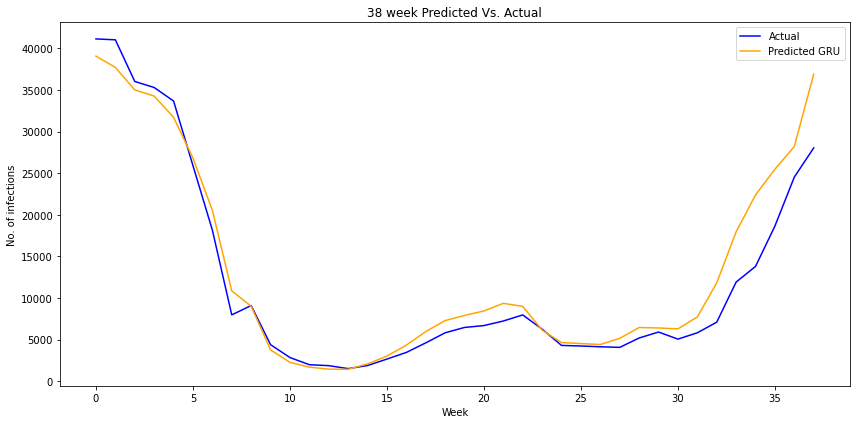

In [36]:
fig, ax = plt.subplots( figsize = (12, 6))
# creating the bar plot
ax.plot(testing_data_38[:-2]*Y_sd_2+Y_mu_2, label='Actual', color ='blue')
ax.plot(y_predict_38*Y_sd_2+Y_mu_2,label='Predicted GRU', color ='orange')
ax.set_xlabel("Week")
ax.set_ylabel("No. of infections")
ax.set_title("38 week Predicted Vs. Actual")
ax.legend()
fig.tight_layout()
plt.show()   

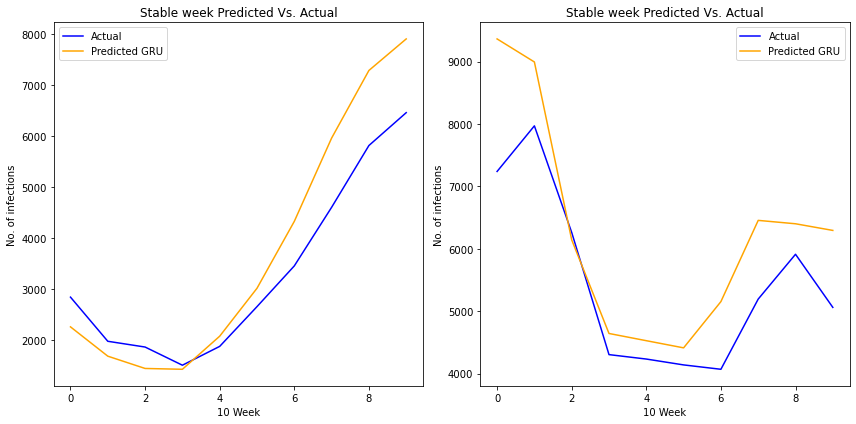

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
# creating the bar plot
ax[0].plot(testing_data_38[10:20]*Y_sd_2+Y_mu_2, color ='blue',label='Actual')
ax[0].plot(y_predict_38[10:20]*Y_sd_2+Y_mu_2,color ='orange', label='Predicted GRU')
ax[0].set_xlabel("10 Week")
ax[0].set_ylabel("No. of infections")
ax[0].set_title("Stable week Predicted Vs. Actual")
ax[0].legend()
ax[1].plot(testing_data_38[21:31]*Y_sd_2+Y_mu_2, label='Actual', color ='blue')
ax[1].plot(y_predict_38[21:31]*Y_sd_2+Y_mu_2,label='Predicted GRU', color ='orange')
ax[1].set_xlabel("10 Week")
ax[1].set_ylabel("No. of infections")
ax[1].set_title("Stable week Predicted Vs. Actual")
ax[1].legend()
fig.tight_layout()
plt.show()  